In [2]:
import os
import sys
import astropy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
from astropy import coordinates as coord
from astropy import units as u
from astropy.io import ascii, fits
import aplpy

# Package versions:
print('Running on:')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')
print(f'\tNumpy\t\t{np.__version__}')
print(f'\tAplpy\t\t{aplpy.__version__}')
#
%matplotlib inline
#python3.6
rc('text', usetex=True)
font = {'family' : 'serif','size'   : 18}
rc('font', **font)

Running on:
	Astropy		4.0.2
	Matplotlib	3.3.4
	Numpy		1.19.5
	Aplpy		2.0.3


In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
def fix_aplpy_fits(aplpy_obj, dropaxis=2):
    """This removes the degenerated dimensions because in APLpy 2.X they fucked it up...
    The input must be the figure returned by aplpy.FITSFigure().
    `dropaxis` is the index where to start dropping the axis (by default it assumes the 3rd,4th place).
    """
    temp_wcs = aplpy_obj._wcs.dropaxis(2)
    temp_wcs = temp_wcs.dropaxis(2)
    aplpy_obj._wcs = temp_wcs

In [5]:
def contour_levels(rms, nsigma=3, n_pos=5, n_neg=1):
    """ Return a list with the values of fluxes to plot a contour figure.
    n_* are the number of contours to positive values (above rms level) or
    negative ones (below rms level).
    It returns three lists:
    - with the negative and positive values for contours.
    - with only the positive contour values.
    - with only the negative contour values"""
    conts_p = [ rms*nsigma*2**(i/2.) for i in range(n_pos)]
    conts_n = [ -rms*5*2**(i/2.) for i in range(n_neg)]
    conts = conts_n[::-1]
    [conts.append(c) for c in conts_p]
    return conts, conts_p,conts_n 

In [6]:
# Because Difmap FITS files do not insert correctly BMAJ, BMIN, PA in the header..
bursts = {'B1': {'beam': {'major': 4*u.mas, 'minor': 2*u.mas, 'angle': 16}},
          'B2': {'beam': {'major': 10*u.mas, 'minor': 5*u.mas, 'angle': 15}}
          }    

## L-band full field plot

In [7]:
ref_pos_cygx1_source_ann = coord.SkyCoord('19h58m20.6717s', '35d12m44.8187s', frame='icrs') #cygx1 position
ref_pos_cygx1 = coord.SkyCoord('19h58m15.1669s', '35d16m44.7139s', frame='icrs') #cygx1 white circle centre
ref_pos_cygx1_ann = coord.SkyCoord('19h58m15.1669s', '35d25m44.7139s', frame='icrs') #cygx1 position
ref_pos_zo = coord.SkyCoord('19h58m14.0s', '35d17m20.7139s', frame='icrs') #centre for zoomed in image
ref_pos_lead_edge = coord.SkyCoord('19h58m05.5841s', '35d21m39.6909s', frame='icrs') #location of leading edge of shock
ref_pos_left_edge = coord.SkyCoord('19h58m40.2259s', '35d17m07.5275s', frame='icrs') #location of left edge of shock
ref_pos_right_edge = coord.SkyCoord('19h57m52.0694s', '35d14m30.8807s', frame='icrs') #location of right edge of shock
ref_pos_right_overdense = coord.SkyCoord('19h57m49.5575s', '35d19m33.3498s', frame='icrs') #location of right over density
ref_pos = coord.SkyCoord('19h58m21.67s', '35d11m50.7000s', frame='icrs') #L-band pointing centre
ref_pos_W1 = coord.SkyCoord('19h57m22.7s', '35d21m42.7000s', frame='icrs')
ref_pos_W1_ann = coord.SkyCoord('19h57m13.7s', '35d28m48.7000s', frame='icrs')
ref_pos_W2 = coord.SkyCoord('19h58m30.1526s', '34d58m00.7543s', frame='icrs')
ref_pos_W2_ann = coord.SkyCoord('19h56m28.8810', '35d19m22.2668s', frame='icrs')

In [20]:
# Load the FITS header
fits_file = './31july_Lband_newest/L-band.fits'
header = fits.getheader(fits_file)

# Extract beam properties from the header
beam_major_deg = header.get('BMAJ', 'N/A')  # Major axis in degrees
beam_minor_deg = header.get('BMIN', 'N/A')  # Minor axis in degrees
beam_angle = header.get('BPA', 'N/A')       # Position angle in degrees

# Convert degrees to arcminutes
beam_major_arcsec = beam_major_deg * 3600 if beam_major_deg != 'N/A' else 'N/A'
beam_minor_arcsec = beam_minor_deg * 3600 if beam_minor_deg != 'N/A' else 'N/A'

print(f"Beam Major: {beam_major_arcsec} arcseconds")
print(f"Beam Minor: {beam_minor_arcsec} arcseconds")
print(f"Beam Angle: {beam_angle} degrees")

Beam Major: 14.269085131978406 arcseconds
Beam Minor: 14.269085131978406 arcseconds
Beam Angle: 0.0 degrees


INFO: Setting slices=[0, 0] [aplpy.core]


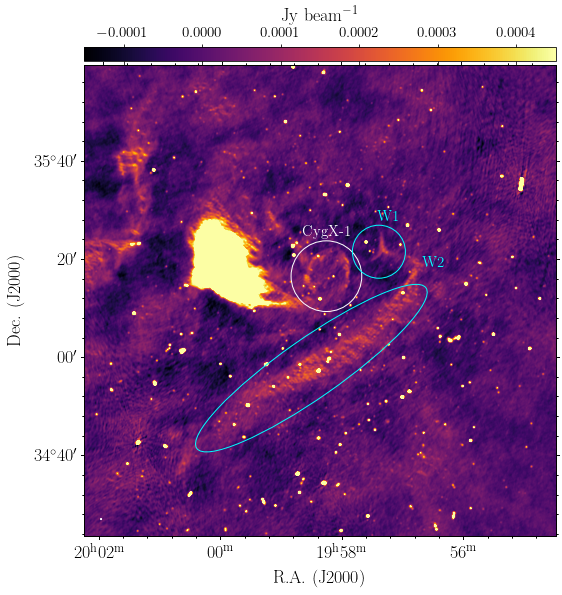

In [86]:
#fig = aplpy.FITSFigure('./positive_briggs_mask3/image.fits')
fig = aplpy.FITSFigure('./31july_Lband_newest/L-band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos.ra.value, ref_pos.dec.value, radius=0.8)
#fig.show_colorscale(vmin=-2.0e-04, vmax=5e-04,interpolation='bicubic', cmap='Greys', stretch='linear') 
fig.show_colorscale(vmin=-1.5e-04, vmax=4.5e-04,interpolation='bicubic', cmap='inferno', stretch='linear') 
fig.add_colorbar()
fig.show_circles(ref_pos_cygx1.ra.value, ref_pos_cygx1.dec.value, radius=0.12, edgecolor='white')
fig.add_label(ref_pos_cygx1_ann.ra.value, ref_pos_cygx1_ann.dec.value, 'CygX-1', fontsize=15, color='white')
fig.show_circles(ref_pos_W1.ra.value, ref_pos_W1.dec.value, radius=0.09, edgecolor='cyan')
fig.add_label(ref_pos_W1_ann.ra.value, ref_pos_W1_ann.dec.value, 'W1',fontsize=15, color='cyan')
fig.show_ellipses(ref_pos_W2.ra.value, ref_pos_W2.dec.value, 0.2, 0.95, angle=125, edgecolor='cyan')
fig.add_label(ref_pos_W2_ann.ra.value, ref_pos_W2_ann.dec.value, 'W2',fontsize=15, color='cyan')
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('L_band_full_field.pdf',bbox_inches='tight')

In [16]:
beam_major = fig.beam.get_major()
beam_minor = fig.beam.get_minor()
beam_angle = fig.beam.get_angle()

print(f"Beam Major: {beam_major}")
print(f"Beam Minor: {beam_minor}")
print(f"Beam Angle: {beam_angle}")

AttributeError: 'Beam' object has no attribute 'get_major'

INFO: Setting slices=[0, 0] [aplpy.core]


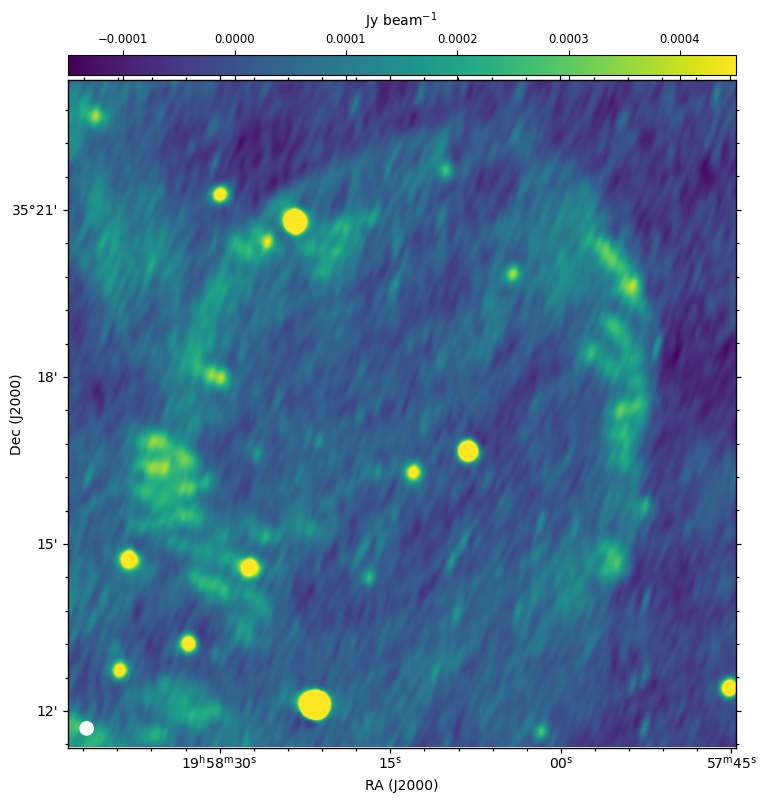

In [8]:
#Zoomed in to the bowshock
fig = aplpy.FITSFigure('./31july_Lband_newest/L-band.fits')
fix_aplpy_fits(fig)
#fig.show_regions('./positive_briggs_mask3/region_for_paper.reg', layer=False)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-1.5e-04, vmax=4.5e-04,interpolation='bicubic', cmap='viridis', stretch='linear') #, vmax=0.8, vmin=0.1)
#fig.show_colorscale(vmin=-2.5e-04, vmax=5e-04,interpolation='bicubic', cmap='bone', stretch='linear') #, vmax=0.8, vmin=0.1)
fig.add_colorbar()
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
#fig.axis_labels.set_xtext(r'R.A. (J2000)')
#fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('./L_band_bowshock_zoomed.pdf',bbox_inches='tight')

In [6]:
contour_levels = [5.5e-5,9.5e-5,1.15e-4,1.55e-4,2.35e-4,3.55e-4]

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


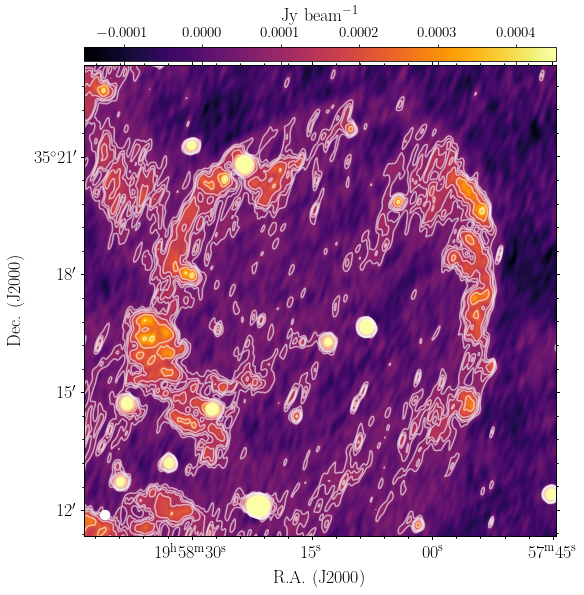

In [137]:
#making contour map
fig = aplpy.FITSFigure('./31july_Lband_newest/L-band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-1.5e-04, vmax=4.5e-04,interpolation='bicubic', cmap='inferno', stretch='linear') #, vmax=0.8, vmin=0.1)
fig.add_colorbar()
fig.show_contour('./31july_Lband_newest/L-band.fits', levels=contour_levels, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('./bowshock_fullzoom.pdf',bbox_inches='tight')

In [7]:
#contour map with smoothed image
from scipy.ndimage import gaussian_filter

# Load your FITS data
data, header = fits.getdata('./31july_Lband_newest/L-band.fits', header=True)

# Apply Gaussian smoothing
sigma = 2.5  # Adjust sigma as needed
smoothed_data = gaussian_filter(data, sigma=sigma)

# Save the smoothed data to a new FITS file
smoothed_fits = './31july_Lband_newest/L-band_smoothed.fits'
fits.writeto(smoothed_fits, smoothed_data, header, overwrite=True)


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


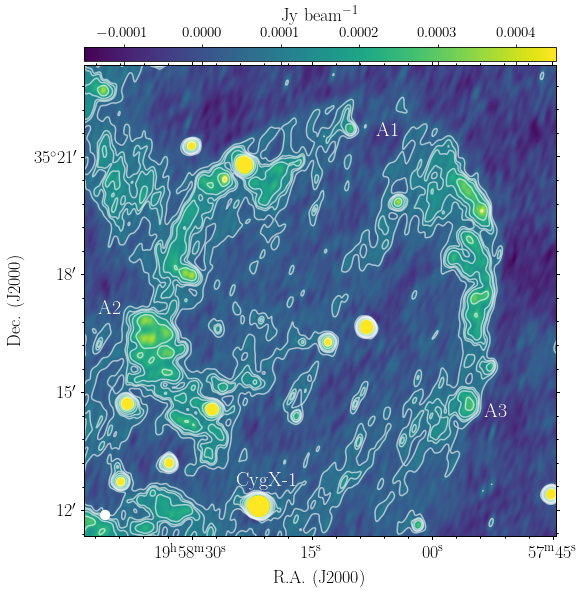

In [11]:
fig = aplpy.FITSFigure('./31july_Lband_newest/L-band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-1.5e-04, vmax=4.5e-04,interpolation='bicubic', cmap='inferno', stretch='linear') #, vmax=0.8, vmin=0.1)
fig.add_colorbar()
fig.show_contour('./31july_Lband_newest/L-band_smoothed.fits', levels=contour_levels, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_label(ref_pos_cygx1_source_ann.ra.value, ref_pos_cygx1_source_ann.dec.value, 'CygX-1', fontsize=20, color='white')
fig.add_label(ref_pos_lead_edge.ra.value, ref_pos_lead_edge.dec.value, 'A1', fontsize=20, color='white')
fig.add_label(ref_pos_left_edge.ra.value, ref_pos_left_edge.dec.value, 'A2', fontsize=20, color='white')
fig.add_label(ref_pos_right_edge.ra.value, ref_pos_right_edge.dec.value, 'A3', fontsize=20, color='white')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('./L-band_contour.pdf',bbox_inches='tight')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


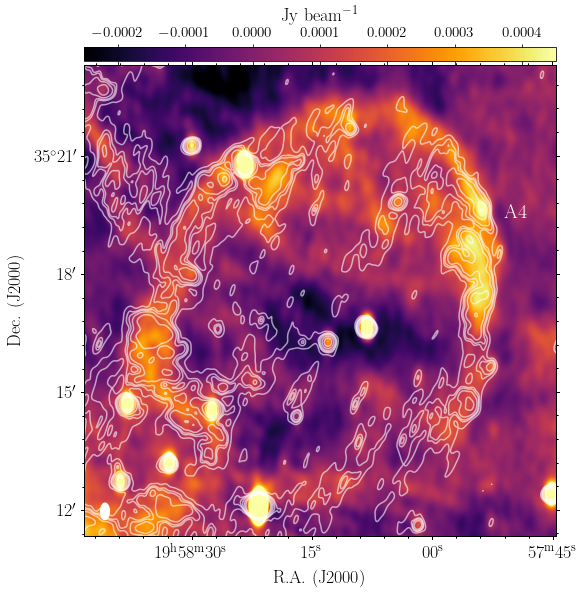

In [10]:
#From Gallo et al. 2005 Zoomed in to the bowshock and with meerkat contours
fig = aplpy.FITSFigure('./positive_briggs_mask3/cygx1_gallo.fits')
fix_aplpy_fits(fig)
#fig.show_regions('./positive_briggs_mask3/region_for_paper.reg', layer=False)
fig.show_contour('./31july_Lband_newest/L-band_smoothed.fits', levels=contour_levels, cmap='afmhot', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-2.5e-04, vmax=4.5e-04,interpolation='bicubic', cmap='inferno', stretch='linear') #, vmax=0.8, vmin=0.1)
fig.add_colorbar()
fig.show_contour('./31july_Lband_newest/L-band_smoothed.fits', levels=contour_levels, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.add_label(ref_pos_right_overdense.ra.value, ref_pos_right_overdense.dec.value, 'A4', fontsize=20, color='white')
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
#plt.show()
plt.savefig('./Gallo+contour.pdf',bbox_inches='tight')

In [14]:
#Width of the bowshock
bowshock_width = [1.7,1.2,0.75,1.5,1.5,2.1,1.3,1.3,0.9,1.2,1.3,0.8,0.7,0.8,1.4,1.5,4.3,1.9,1.4]
bowshock_width_mean = np.mean(bowshock_width)
bowshock_width_std = np.std(bowshock_width)
bowshock_width_err = bowshock_width_std/np.sqrt(len(bowshock_width))
print(f'The mean width of the bowshock is {bowshock_width_mean} with an error of {bowshock_width_err}')

The mean width of the bowshock is 1.45 with an error of 0.17625686368042473
